### In den ersten Blöcken habe ich den Conjugate Gradient Alrogrithm der Numerical Recipes implementiert

In [1]:
# dbrent

import numpy as np
#include <math.h>
#include <stdio.h>
ITMAX1 =4000
ZEPS =1.0e-7/2
def SIGN( b, a):
    return b*a/np.abs(a)

def dbrent( ax,  bx,  cx, f,df,tol, kwa,dkwa):
# /*Given a function f and its derivative function df, and given a bracketing triplet of abscissas ax,
# bx, cx [such that bx is between ax and cx, and f(bx) is less than both f(ax) and f(cx)],
# this routine isolates the minimum to a fractional precision of about tol using a modification of
# Brent’s method that uses derivatives. The abscissa of the minimum is returned as xmin, and
# 10.3 One-Dimensional Search with First Derivatives 407
# the minimum function value is returned as dbrent, the returned function value.*/
# {
# int iter,ok1,ok2  //Will be used as flags for whether proposed steps are acceptable or not.
#  a,b,d,d1,d2,du,dv,dw,dx,e=0.0  
#  fu,fv,fw,fx,olde,tol1,tol2,u,u1,u2,v,w,x,xm 
# // Comments following will point out only differences from the routine brent. Read that
# // routine first.
    e=0
    d=0
    a=min(ax,cx)
    b=max(cx,ax)
    x=w=v=bx
    fw=fv=fx=f(bx,kwa)
    dw=dv=dx=df(bx,dkwa)#  //All our housekeeping chores are d by the necessity of moving
    # // derivative values around as well
    # // as function values.
    for iter in range(ITMAX1):
        xm=0.5*(a+b)
        tol1=tol*np.abs(x)+ZEPS
        tol2=2.0*tol1
        if (np.abs(x-xm) <= (tol2-0.5*(b-a))):
            xmin=x
            return xmin, fx
        
        if (np.abs(e) > tol1):
            d1=2.0*(b-a)#  //Initialize these d’s to an out-of-bracket value.
            d2=d1
            if (dw != dx):
                d1=(w-x)*dx/(dx-dw)#  //Secant method with one point.
            if (dv != dx):
                d2=(v-x)*dx/(dx-dv)#  //And the other.
            # // Which of these two estimates of d shall we take? We will insist that they be within
            # // the bracket, and on the side pointed to by the derivative at x:
            u1=x+d1
            u2=x+d2
            ok1 = (a-u1)*(u1-b) > 0.0 and dx*d1 <= 0.0
            ok2 = (a-u2)*(u2-b) > 0.0 and dx*d2 <= 0.0
            olde=e#  //Movement on the step before last.
            e=d
            if (ok1 or ok2):# { //Take only an acceptable d, and if
            # // both are acceptable, then take
            # // the smallest one.
                if (ok1 and ok2):
                    if(np.abs(d1) < np.abs(d2)):
                        d= d1
                    else:
                        d = d2
                elif (ok1):
                    d=d1
                else:
                    d=d2
                if (np.abs(d) <= np.abs(0.5*olde)): 
                    u=x+d
                    if (u-a < tol2 or b-u < tol2):
                        d=SIGN(tol1,xm-x)
                else:#{//Bisect, not golden section.
                    if (dx >= 0.0):
                        e = a-x 
                    else:
                        e = b-x
                    d = 0.5*e
                # // Decide which segment by the sign of the derivative.
                # }
            else:
                if (dx >= 0.0):
                    e = a-x 
                else:
                    e = b-x
                d = 0.5*e
            
        else:
            if (dx >= 0.0):
                e = a-x 
            else:
                e = b-x
            d = 0.5*e
       
        if (np.abs(d) >= tol1): 
            u=x+d
            fu=f(u,kwa)
        else: 
            u=x+SIGN(tol1,d)
            fu=f(u,kwa)
            if (fu > fx):# { //If the minimum step in the downhill
            # // direction takes us uphill, then
            # // we are done.
                xmin=x
                return xmin, fx
        
        du=df(u,dkwa)#  //Now all the housekeeping, sigh.
        if (fu <= fx): 
            if (u >= x):
                a=x
            else:
                b=x
            v,fv,dv= w,fw,dw
            w,fw,dw= x,fx,dx
            x,fx,dx= u,fu,du
        else:
            if (u < x):
                a=u
            else:
                b=u
            # print(fu, fw, w, x)
            if (fu <= fw or w == x):
                v,fv,dv= w,fw,dw
                w,fw,dw= u,fu,du
            elif (fu < fv or v == x or v == w):
                v,fv,dv= u,fu,du
           
    print("Too many iterations in routine dbrent")
    return x, fx


In [194]:
# mnbrak

#include <math.h>
GOLD= 1.618034
GLIMIT =100.0
TINY =1.0e-20
#define SHFT(a,b,c,d) (a)=(b) (b)=(c) (c)=(d) 
# // double SIGN(double b,double a) {
# //     return b*a/np.abs(a) 
# // }
# double max(double a, double b)
# {
#     double ret = (a>b ? a : b ) 
#     return ret 

# }
# /*Here GOLD is the default ratio by which successive intervals are magnified  GLIMIT is the
# maximum magnification allowed for a parabolic-fit step.*/
def mnbrak(ax, bx, cx, func,kwa):
# /*Given a function func, and given distinct initial points ax and bx, this routine searches in
# the downhill direction (defined by the function as evaluated at the initial points) and returns
# new points ax, bx, cx that bracket a minimum of the function. Also returned are the function
# values at the three points, fa, fb, and fc.*/
# {
# double ulim,u,r,q,fu,dum 
    # print(1)
    fa=func(ax,kwa)
    fb=func(bx,kwa)
    
    if (fb > fa):
        ax, bx = bx, ax
        fa, fb = fb, fa #//Switch roles of a and b so that we can go
    
    cx=(bx)+GOLD*(bx-ax)#  //First guess for c.
   
    fc=func(cx,kwa)
    
    if (fc>fb):
        return ax, bx, cx
    itera =0
    while (fb > fc):
        itera +=1
        
        # { //Keep returning here until we bracket.
        r=(bx-ax)*(fb-fc)#  //Compute u by parabolic extrapolation from
        # // a, b, c. TINY is used to prevent any possible division by zero.
        q=(bx-cx)*(fb-fa)
        u=(bx)-((bx-cx)*q-(bx-ax)*r)/(2.0*SIGN(max(np.abs(q-r),TINY),q-r))
        ulim=(bx)+GLIMIT*(cx-bx)
        # // We won’t go farther than this. Test various possibilities:
        if ((bx-u)*(u-cx) > 0.0):# { //Parabolic u is between b and c: try it.
            fu=func(u,kwa)
            if (fu < fc):# {// Got a minimum between b and c.
                ax=bx
                bx=u
                fa=fb
                fb=fu
                # print(ax, bx, cx)
                return ax, bx, cx
            elif (fu > fb):# { //Got a minimum between between a and u.
                cx=u
                fc=fu
                # print(ax, bx, cx)
                return ax, bx, cx
            
            u=(cx)+GOLD*(cx-bx)#  //Parabolic fit was no use. Use default magfu=(*func)(u)  nification.
        elif ((cx-u)*(u-ulim) > 0.0):# { //Parabolic fit is between c and its
            fu=func(u,kwa)# // allowed limit.
            if (fu < fc): 
                bx,cx,u =cx,u,cx+GOLD*(cx-bx)
                fb,fc,fu =fc,fu,func(u,kwa)
        
        elif ((u-ulim)*(ulim-cx) >= 0.0):# { //Limit parabolic u to maximum
            u=ulim#  //allowed value.
            fu=func(u,kwa)
        else:# { //Reject parabolic u, use default magnificau=(*cx)+GOLD*(*cx-*bx)  tion.
            fu= func(u,kwa)
        
        ax,bx,cx = bx,cx,u  #//Eliminate oldest point and continue.
        fa,fb,fc=fb,fc,fu
        # print(itera)
        # if (itera%5==0):
        #     print(ax,bx,cx)
    


In [2]:
# dlinmin mit scipy Alternative

from scipy.optimize import minimize
#include "1dim_functions.h"
TOL =2.0e-6 #//Tolerance passed to dbrent.

def df1dim(x,kwargs):
    pcom = kwargs[0]
    direction = kwargs[1]
    der = kwargs[2]
    df1=0.0
    xt = np.zeros_like(pcom)
    df = np.zeros_like(pcom)
    xt = pcom +x *direction
    df = der(xt)
    df1 = np.dot(direction,df)
    return df1

def f1dim(x,kwargs):
    pcom = kwargs[0]
    direction = kwargs[1]
    function = kwargs[2]
    xt = np.zeros_like(pcom)
    xt = pcom +x *direction
    return function(xt)

#  //Global variables communicate with df1dim.
# double *pcom,*xicom,(*nrfunc)(double []) 
# void (*nrdfun)(double [], double []) 
# int ncom 
def dlinmin( p,  xi,  n, fret, func,dfunc):
# /*Given an n-dimensional point p[1..n] and an n-dimensional direction xi[1..n], moves and
# resets p to where the function func(p) takes on a minimum along the direction xi from p,
# and replaces xi by the actual vector displacement that p was moved. Also returns as fret
# the value of func at the returned location p. This is actually all accomplished by calling the
# routines mnbrak and dbrent.*/


# double dbrent(double ax, double bx, double cx,double (*f) , double (*df) , double tol, double *xmin) 
# double f1dim(double x) 
# double df1dim(double x) 
# double (*p_f1d)  
# double (*p_df1d)  
# p_df1d = df1dim 
# p_f1d= f1dim 
# void mnbrak(double *ax, double *bx, double *cx, double *fa, double *fb,double *fc, double (*func) ) 
# int j 
# double xx,xmin,fx,fb,fa,bx,ax 
# ncom=n  //Define the global variables.
# double vec1[5] 
# double vec2[5] 
    pcom=np.zeros_like(p)
    xicom=np.ones_like(p)

    for j in range(n):
        pcom[j]=p[j]
        xicom[j]=xi[j]
    
    ax=0.0#  //Initial guess for brackets.
    xx=1.0
    bx =-1
    kw = [pcom,xicom,func]
    kw_d = (pcom,xicom,dfunc)
    # fa , fb, fx = f1dim(ax,kw), f1dim(bx,kw), f1dim(xx,kw)

    ax, xx, bx = mnbrak(ax,xx,bx,f1dim,kw)
    xmin, fret=dbrent(ax,xx,bx,f1dim,df1dim,TOL,kw,kw_d)
    
    # res = minimize(f1dim,0,args=kw) # kann auch mit scipy minimize betrieben werden, funktioniert aber trotzdem nicht bei dieser fit funktion
    # xmin= res.x
    # fret = res.fun

    # // printf("xmin:%e\n",xmin) 
    # // printf("%f, %f\n",xi[0],xi[1]) 
    # // printf("%f, %f\n",p[0],p[1]) 
    # for (j=0 j<n j++) { //Construct the vector results to return.
    xi = xmin*xi
    p = xi+p
    
    return p, xi, fret


In [3]:
# frprmn der eigentliche CG

from copy import deepcopy
ITMAX =2000
EPS =1.0e-10
def frprmn(p,  n,  ftol,  func, dfunc):
# /*Given a starting point p[1..n], Fletcher-Reeves-Polak-Ribiere minimization is performed on a
# function func, using its gradient as calculated by a routine dfunc. The convergence tolerance
# on the function value is input as ftol. Returned quantities are p (the location of the minimum),
# iter (the number of iterations that were performed), and fret (the minimum value of the
# function). The routine linmin is called to perform line minimizations.*/
# {
# void dlinmin(double p[], double xi[], int n, double *fret, double (*func)(double []),void (*dfunc)(double [], double [])) 
# int j,its 
# double gg,gam,fp,dgg 


# double g[n] 
# double h[n] 
# double xi[n] 
    
    h = np.zeros_like(p)
    fp=func(p)#//Initializations.
    xi =dfunc(p)
    g = (-1)*xi
    h= np.copy(g)
    xi*=-1
    
    
    
    # }
    # double store_p[n] 
    # double rtol 
    fret = 0
    for its in range(1,ITMAX+1):# { //Loop over iterations.
        

        # print("p: %f, %.8f\n",p[0],p[1]) 
        # printf("xi2: %f, %.8f\n",xi[0],xi[1]) 
        print(f"xi before linmin:{xi}")
        p, xi, fret = dlinmin(p,xi,n,fret,func,dfunc)
        rtol = 2* np.abs(fret-fp)/(np.abs(fret)+np.abs(fp)+EPS)
        print(f"p afer linmin:{p}")
        # printf("fret: %.10f\n",*fret)  //Next statement is the normal return:
        print(f"xi after linmin:{xi}")
        if ((2.0*np.abs(fret-fp)) <= ftol*(np.abs(fret)+np.abs(fp)+EPS)):
        
            return p, rtol, fret, its
        
        fp= fret
        xi = dfunc(p)
        print(f"xi after derv:{xi}")
        # printf("xi: %f, %.8f\n",xi[0],xi[1]) 
        dgg=gg=0.0
        gg = np.dot(g,g)
        dgg = np.dot(xi+g,xi)
        # for (j=0 j<n j++) {
        #     gg += g[j]*g[j] 
        # dgg += xi[j]*xi[j]   //This statement for Fletcher-Reeves.
        # // dgg += (xi[j]+g[j])*xi[j]  //This statement for Polak-Ribiere.
        # }
        if (gg == 0.0):# { //Unlikely. If gradient is exactly zero then
        # //FREEALL           we are already done.
            print("gg is 0.")
            return p, rtol, fret, its
        
        gam=dgg/gg
        g = (-1)*xi
        xi =  g+gam*h*0.06
        h= np.copy(xi)
        # for (j=0 j<n j++) {
        # g[j] = -xi[j] 
        # xi[j]=h[j]=g[j]+gam*h[j] 
    
    print("Too many iterations in frprmn") 
    return p, rtol, fret, its


In [4]:
import pandas as pd
data = pd.read_csv("ag_decay.txt",header=None,sep='\t')
data = data.to_numpy()


In [47]:
# Funktionsdefinitionen es wurden fit_func und der_ff verwendet
dev = np.sqrt(data[:,1])
def fit_func(v):
    result = 0
    for i in range(120):
        result += (v[0]*np.exp(-v[1]*i*5)*(1-np.exp(-v[1]*5))+v[2]*np.exp(-v[3]*i*5)*(1-np.exp(-v[3]*5))+v[4]-data[i,1])**2/dev[i]**2
    if np.isinf(result):
        result = np.exp(200)
    elif v[4]<0:
        result += np.exp(-7*v[4])+np.exp(7)
    return result
def der_ff(v):
    storage=np.zeros(5)
    for i in range(120):
        storage[0]+=(v[0]* np.exp(-v[1]* i*5)*(1- np.exp(-v[1]*5))+v[2]* np.exp(-v[3]* i*5)*(1- np.exp(-v[3]*5))+v[4]- data[i][1])* np.exp(-v[1]* i*5)*(1- np.exp(-v[1]*5))*2/dev[i]/dev[i] 
        storage[1]+=(v[0]* np.exp(-v[1]* i*5)*(1- np.exp(-v[1]*5))+v[2]* np.exp(-v[3]* i*5)*(1- np.exp(-v[3]*5))+v[4]- data[i][1])*v[0]* np.exp(-v[1]* i*5)*(- i*5+5* (i+1)* np.exp(-v[1]*5))*2/dev[i]/dev[i] 
        storage[2]+=(v[0]* np.exp(-v[1]* i*5)*(1- np.exp(-v[1]*5))+v[2]* np.exp(-v[3]* i*5)*(1- np.exp(-v[3]*5))+v[4]- data[i][1])* np.exp(-v[3]* i*5)*(1- np.exp(-v[3]*5))*2/dev[i]/dev[i] 
        storage[3]+=(v[0]* np.exp(-v[1]* i*5)*(1- np.exp(-v[1]*5))+v[2]* np.exp(-v[3]* i*5)*(1- np.exp(-v[3]*5))+v[4]- data[i][1])*v[2]* np.exp(-v[3]* i*5)*(- i*5+5* (i+1)* np.exp(-v[3]*5))*2/dev[i]/dev[i] 
        storage[4]+=(v[0]* np.exp(-v[1]* i*5)*(1- np.exp(-v[1]*5))+v[2]* np.exp(-v[3]* i*5)*(1- np.exp(-v[3]*5))+v[4]- data[i][1])*2/dev[i]/dev[i] 
    if v[4]<0:
        storage[4] -=7*np.exp(-7*v[4])
    return storage

def fit_func2(v):
    result = 0
    for i in range(120):
        result += (v[0]*v[1]*5*np.exp(-v[1]*i*5)+v[2]*5*np.exp(-v[3]*i*5)*v[3]+v[4]-data[i,1])**2/dev[i]**2
    if np.isinf(result):
        result = np.exp(200)

    return result

def der_ff2(v):
    storage=np.zeros(5)
    for i in range(120):
        storage[0]+=(v[0]* np.exp(-v[1]* i*5)*v[1]+v[2]* np.exp(-v[3]* i*5)*v[3]+v[4]/5- data[i][1]/5)* np.exp(-v[1]* i*5)*v[1]*10/dev[i]/dev[i] 
        storage[1]+=(v[0]* np.exp(-v[1]* i*5)*v[1]+v[2]* np.exp(-v[3]* i*5)*v[3]+v[4]/5- data[i][1]/5)*v[0]* np.exp(-v[1]* i*5)*(1-5*i*v[1])*10/dev[i]/dev[i] 
        storage[2]+=(v[0]* np.exp(-v[1]* i*5)*v[1]+v[2]* np.exp(-v[3]* i*5)*v[3]+v[4]/5- data[i][1]/5)* np.exp(-v[3]* i*5)*v[3]*10/dev[i]/dev[i] 
        storage[3]+=(v[0]* np.exp(-v[1]* i*5)*v[1]+v[2]* np.exp(-v[3]* i*5)*v[3]+v[4]/5- data[i][1]/5)*v[2]* np.exp(-v[3]* i*5)*(1-5*i*v[3])*10/dev[i]/dev[i] 
        storage[4]+=(v[0]* np.exp(-v[1]* i*5)*v[1]+v[2]* np.exp(-v[3]* i*5)*v[3]+v[4]/5- data[i][1]/5)*10/dev[i]/dev[i] 
    return storage


In [ ]:
der_ff([1,0.4,4,0.3,5])

In [ ]:
p_0 = np.array([1000,0.51,1000,0.5,24])
xi_0 = np.array([1,2,-1,4,3])
print(fit_func(p_0))
kwag = p_0,xi_0,fit_func
mnbrak(1,0.2,0.7,f1dim,kwag)
print(mnbrak(1,0.2,0.7,f1dim,kwag))

In [231]:
# CG der NR wird ausprobiert
p_0 = np.array([40,0.03,60,0.05,0])
p , final_tol, f_value, iterations = frprmn(p_0,5,1e-14,fit_func2,der_ff2)
p ,final_tol, f_value, iterations


xi before linmin:[  0.42330483  37.23446775   0.44273346  60.29306518 239.43666944]
p afer linmin:[40.01871911  1.6765581  60.01957827  2.7162402  10.58821063]
xi after linmin:[ 0.01871911  1.6465581   0.01957827  2.6662402  10.58821063]
xi after derv:[   2.09175203   50.08037146    3.39012469   74.91213923 -133.30849611]
xi before linmin:[ -2.0916006  -50.06705209  -3.38996632 -74.89057144 133.39414645]
p afer linmin:[39.97808936  0.70399587 59.95372751  1.26147627 13.17941789]
xi after linmin:[-0.04062975 -0.97256223 -0.06585076 -1.45476393  2.59120726]
xi after derv:[  -0.40207967  -14.21811484   -0.65003459  -29.54699854 -109.73867588]
xi before linmin:[  0.39521185  14.05371846   0.63890355  29.30109353 110.1766788 ]
p afer linmin:[39.99221824  1.20641838 59.97656841  2.30899471 17.11825048]
xi after linmin:[0.01412888 0.50242252 0.0228409  1.04751844 3.9388326 ]
xi after derv:[  0.79001747  27.32215741   1.52281358  39.56842972 -70.09931755]
xi before linmin:[ -0.78803758 -27.251

/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1659/3618087878.py:22: RuntimeWarning: overflow encountered in double_scalars
  result += (v[0]*v[1]*5*np.exp(-v[1]*i*5)+v[2]*5*np.exp(-v[3]*i*5)*v[3]+v[4]-data[i,1])**2/dev[i]**2
/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1659/3618087878.py:22: RuntimeWarning: overflow encountered in exp
  result += (v[0]*v[1]*5*np.exp(-v[1]*i*5)+v[2]*5*np.exp(-v[3]*i*5)*v[3]+v[4]-data[i,1])**2/dev[i]**2
/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1659/3618087878.py:22: RuntimeWarning: overflow encountered in double_scalars
  result += (v[0]*v[1]*5*np.exp(-v[1]*i*5)+v[2]*5*np.exp(-v[3]*i*5)*v[3]+v[4]-data[i,1])**2/dev[i]**2
/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1659/3618087878.py:22: RuntimeWarning: overflow encountered in exp
  result += (v[0]*v[1]*5*np.exp(-v[1]*i*5)+v[2]*5*np.exp(-v[3]*i*5)*v[3]+v[4]-data[i,1])**2/dev[i]**2
/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1659/36

(array([3.99935194e+01, 4.01474617e-02, 5.99627215e+01, 2.29897649e+00,
        2.30881843e+01]),
 0.0,
 6326.5431122211285,
 10)

In [51]:
# scipy minimize wird angewandt
p_0 = np.array([40,0.03,60,0.05,0])
b= ((0,np.inf),(0,np.inf),(0,np.inf),(0,np.inf),(0,np.inf))
opt = {"xtol":5/10**10,"maxiter":4000}
res_f =minimize(fit_func,p_0,method='Newton-CG',jac=der_ff,options=opt)
res_f

/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_2119/2772661711.py:5: RuntimeWarning: overflow encountered in double_scalars
  result += (v[0]*np.exp(-v[1]*i*5)*(1-np.exp(-v[1]*5))+v[2]*np.exp(-v[3]*i*5)*(1-np.exp(-v[3]*5))+v[4]-data[i,1])**2/dev[i]**2
/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_2119/2772661711.py:5: RuntimeWarning: overflow encountered in exp
  result += (v[0]*np.exp(-v[1]*i*5)*(1-np.exp(-v[1]*5))+v[2]*np.exp(-v[3]*i*5)*(1-np.exp(-v[3]*5))+v[4]-data[i,1])**2/dev[i]**2
/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_2119/2772661711.py:14: RuntimeWarning: overflow encountered in double_scalars
  storage[0]+=(v[0]* np.exp(-v[1]* i*5)*(1- np.exp(-v[1]*5))+v[2]* np.exp(-v[3]* i*5)*(1- np.exp(-v[3]*5))+v[4]- data[i][1])* np.exp(-v[1]* i*5)*(1- np.exp(-v[1]*5))*2/dev[i]/dev[i]
/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_2119/2772661711.py:15: RuntimeWarning: overflow encountered in double_scalars
  storage[1]+=(v[0]* np.exp

     fun: 135.97930921424282
     jac: array([-0.00948445, -0.07226071, -0.00564233,  0.00377537, -0.00373533])
 message: 'Optimization terminated successfully.'
    nfev: 444
    nhev: 0
     nit: 187
    njev: 1434
  status: 0
 success: True
       x: array([5.01045194e+03, 4.49214769e-03, 4.99518790e+03, 2.83608119e-02,
       1.32371625e+00])

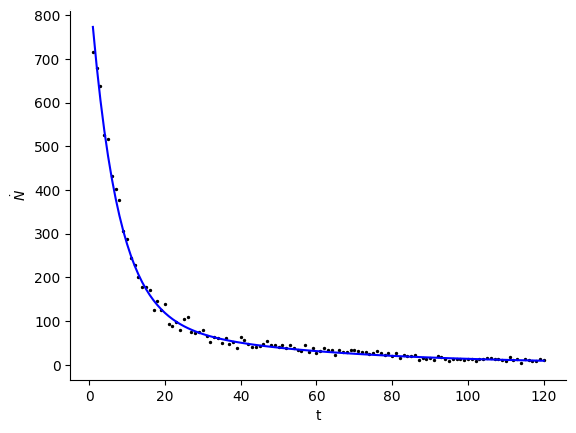

In [52]:
# Plotten der Lösung, hier kann auch die Lösung des NR simplex Algorithmus in C dargestellt werden.
import matplotlib.pyplot as plt
model = np.zeros(120)
v=res_f.x
# v = np.array([4.00000000e+03, 3.46200874e-03, 6.00000000e+03, 2.33962691e-02,3.50566562e-05])
for i in range(120):
    model[i] = v[0]*np.exp(-v[1]*i*5)*(1-np.exp(-v[1]*5))+v[2]*np.exp(-v[3]*i*5)*(1-np.exp(-v[3]*5))+v[4]
plt.figure(facecolor="white")
ax = plt.axes()
ax.set_facecolor("white")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.ticklabel_format(style='scientific',scilimits=(-3,3))
ax.tick_params(axis='y', colors='black')
ax.set_xlabel('t')
ax.set_ylabel(r"$\dot{N}$")
ax.scatter(data[:,0],data[:,1],s=2,color="black")
ax.plot(data[:,0],model,color='blue')
# ax.plot(data[:,0],model_res,color='red')
plt.show()

In [205]:
#ein Testproblem, für das frprmn funktioniert
def func1(x):

    return x[0]*x[0]*x[0]*x[0]-x[1]*x[0]*x[0]-3*x[0]*x[1]*x[1]+x[1]*x[1]*x[1]*x[1]

def d_func1( x):
    grad = np.zeros_like(x)
    grad[0] = 4*x[0]*x[0]*x[0]-2*x[1]*x[0]-3*x[1]*x[1]
    grad[1]= -x[0]*x[0]-6*x[1]*x[0]+4*x[1]*x[1]*x[1]
    return grad

p0 = np.array([2,6])
p, final_tol, f_value, iterations = frprmn(p0,2,1e-14,func1,d_func1)
p, final_tol, f_value ,iterations


xi before linmin:[ 100 -788]
p afer linmin:[2.47999633 2.2176289 ]
xi after linmin:[ 0.47999633 -3.7823711 ]
xi after derv:[35.25864032  4.47546211]
xi before linmin:[-35.05855896  -6.05210327]
p afer linmin:[1.63491481 2.07174383]
xi after linmin:[-0.84508152 -0.14588508]
xi after derv:[-2.17045779 12.57301851]
xi before linmin:[ -2.90983574 -13.4500215 ]
p afer linmin:[1.53640393 1.61640075]
xi after linmin:[-0.09851089 -0.45534308]
xi after derv:[ 1.70181038 -0.36819067]
xi before linmin:[-1.90477104 -0.56994658]
p afer linmin:[1.4476496  1.58984363]
xi after linmin:[-0.08875433 -0.02655712]
xi after derv:[-0.05058582  0.16906432]
xi before linmin:[-0.06217603 -0.20280497]
p afer linmin:[1.44469377 1.58020233]
xi after linmin:[-0.00295583 -0.0096413 ]
xi after derv:[ 0.00417792 -0.00128087]
xi before linmin:[-0.00507036 -0.00163007]
p afer linmin:[1.44446026 1.58012726]
xi after linmin:[-2.33506315e-04 -7.50699532e-05]
xi after derv:[-2.87726119e-06  8.97964766e-06]
xi before linmin

(array([1.44446009, 1.58012674]), 0.0, -3.529116346310592, 8)

In [206]:
minimize(func1,p0)

      fun: -3.5291163463105475
 hess_inv: array([[0.06804295, 0.03976085],
       [0.03976085, 0.06840321]])
      jac: array([-8.34465027e-07,  1.49011612e-06])
  message: 'Optimization terminated successfully.'
     nfev: 57
      nit: 17
     njev: 19
   status: 0
  success: True
        x: array([1.44446008, 1.58012679])

In [207]:
# Test von mnbrak und dbrent
po = np.array([4.e+03 ,3.e-02, 6.e+03 ,5.e-02 ,0.e+00])
xis = np.array([-1.11364152e+00, -1.67769485e+05, -1.72017166e+00, -1.32406214e+05,1.88968488e+02])
kwargs = po, xis, fit_func
d_kwargs = po, xis, der_ff
ax, bx, cx = mnbrak(1,0,-1,f1dim,kwargs)
xmin, ymin = dbrent(ax,bx,cx,f1dim,df1dim,1e-18,kwargs,d_kwargs)
p1= po+xmin*xis
print(der_ff(p1))
ymin

[-2.19017473e-01  7.40420709e+04  1.67472482e-01  3.81977614e+04
 -4.32540567e+01]


/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1659/3804638993.py:5: RuntimeWarning: overflow encountered in exp
  result += (v[0]*np.exp(-v[1]*i*5)*(1-np.exp(-v[1]*5))+v[2]*np.exp(-v[3]*i*5)*(1-np.exp(-v[3]*5))+v[4]-data[i,1])**2/dev[i]**2
/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1659/3804638993.py:12: RuntimeWarning: overflow encountered in exp
  storage[0]+=(v[0]* np.exp(-v[1]* i*5)*(1- np.exp(-v[1]*5))+v[2]* np.exp(-v[3]* i*5)*(1- np.exp(-v[3]*5))+v[4]- data[i][1])* np.exp(-v[1]* i*5)*(1- np.exp(-v[1]*5))*2/dev[i]/dev[i]
/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1659/3804638993.py:13: RuntimeWarning: overflow encountered in exp
  storage[1]+=(v[0]* np.exp(-v[1]* i*5)*(1- np.exp(-v[1]*5))+v[2]* np.exp(-v[3]* i*5)*(1- np.exp(-v[3]*5))+v[4]- data[i][1])*v[0]* np.exp(-v[1]* i*5)*(- i*5+5* (i+1)* np.exp(-v[1]*5))*2/dev[i]/dev[i]
/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1659/3804638993.py:14: RuntimeWarning: overflow encoun

372.6520462869301

In [208]:
# vergleich mit scipy
from scipy.optimize import minimize
def test(x):
    return f1dim(x,kwargs)

res = minimize(test,-1)
res.x
print(res.fun)
der_ff(po+res.x*xis)

129979.83407049


/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1659/3804638993.py:5: RuntimeWarning: overflow encountered in exp
  result += (v[0]*np.exp(-v[1]*i*5)*(1-np.exp(-v[1]*5))+v[2]*np.exp(-v[3]*i*5)*(1-np.exp(-v[3]*5))+v[4]-data[i,1])**2/dev[i]**2
/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1659/3804638993.py:5: RuntimeWarning: overflow encountered in exp
  result += (v[0]*np.exp(-v[1]*i*5)*(1-np.exp(-v[1]*5))+v[2]*np.exp(-v[3]*i*5)*(1-np.exp(-v[3]*5))+v[4]-data[i,1])**2/dev[i]**2
/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1659/3804638993.py:5: RuntimeWarning: overflow encountered in exp
  result += (v[0]*np.exp(-v[1]*i*5)*(1-np.exp(-v[1]*5))+v[2]*np.exp(-v[3]*i*5)*(1-np.exp(-v[3]*5))+v[4]-data[i,1])**2/dev[i]**2
/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1659/3804638993.py:5: RuntimeWarning: overflow encountered in exp
  result += (v[0]*np.exp(-v[1]*i*5)*(1-np.exp(-v[1]*5))+v[2]*np.exp(-v[3]*i*5)*(1-np.exp(-v[3]*5))+v[4]-data[i,1])**

array([  25.97049504,    0.        ,   25.97049504,    0.        ,
       -217.46500396])